In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the data file
df=pd.read_csv("heart.csv")
#printing first five rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# shape of dataframe
df.shape

(303, 14)

<AxesSubplot:xlabel='sex', ylabel='count'>

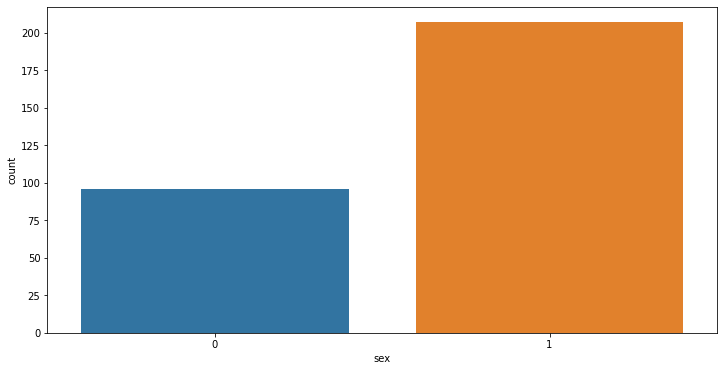

In [8]:
# value count for sex column

plt.figure(figsize=(12,6))
sns.countplot(x="sex",data=df)

<Figure size 864x432 with 0 Axes>

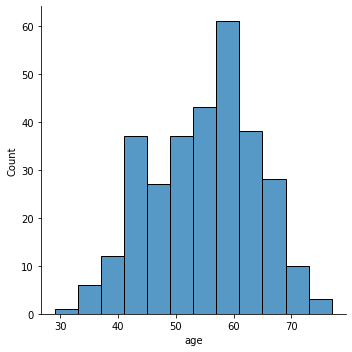

In [25]:
# distribution plot for age

plt.figure(figsize=(12,6))
sns.displot(x='age',data=df)

<AxesSubplot:>

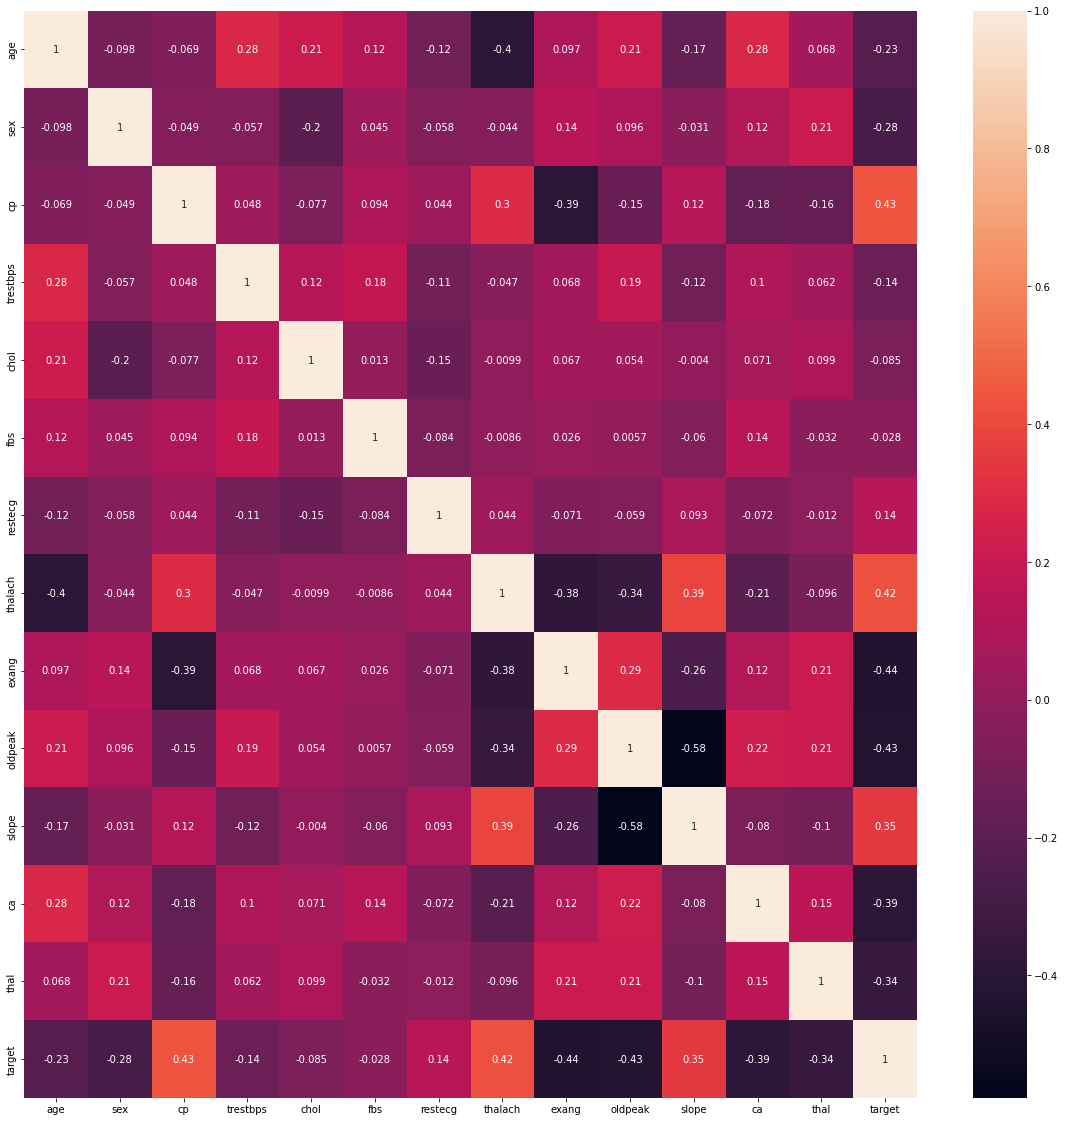

In [27]:
# correlation of features

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


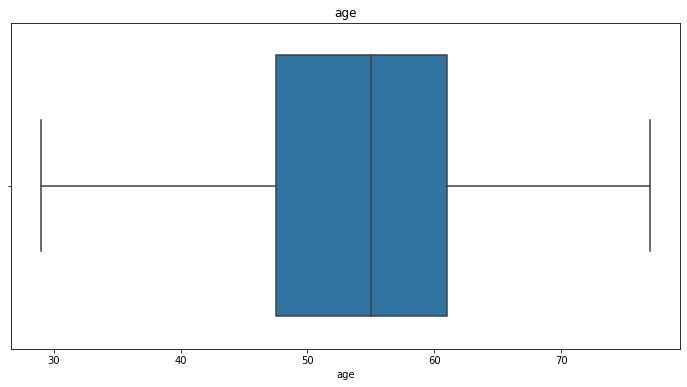

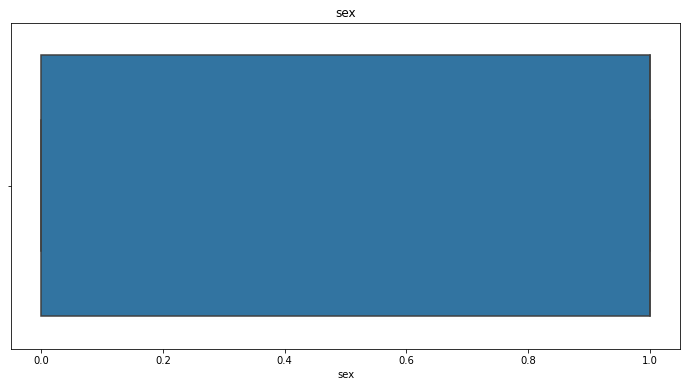

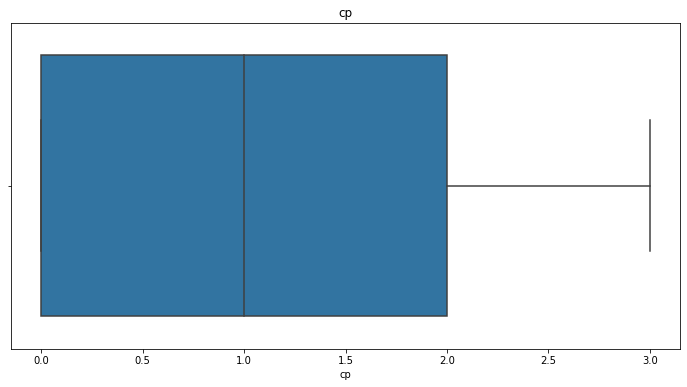

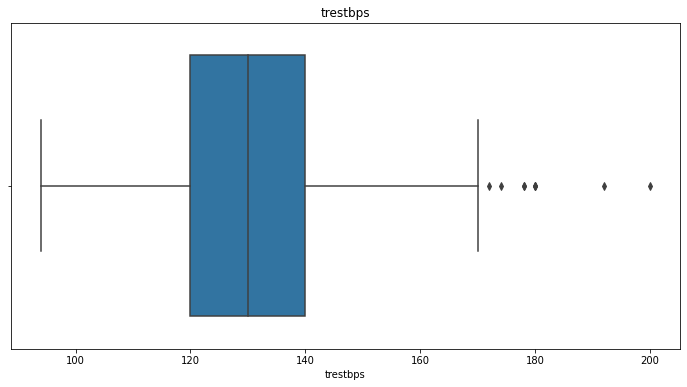

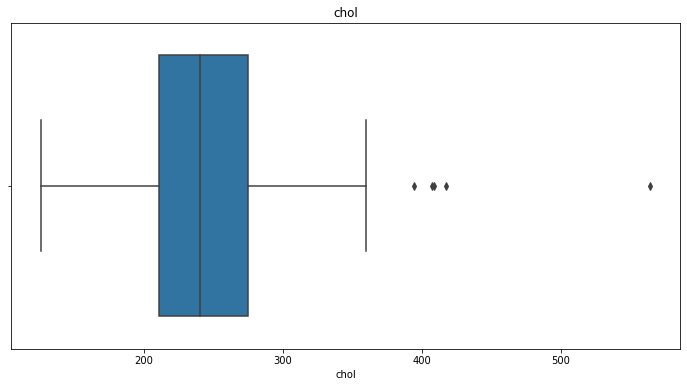

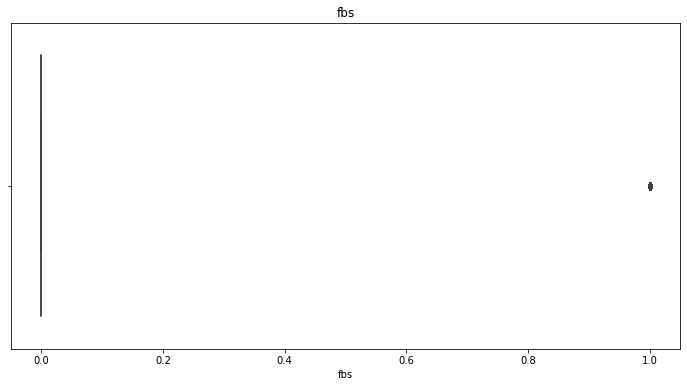

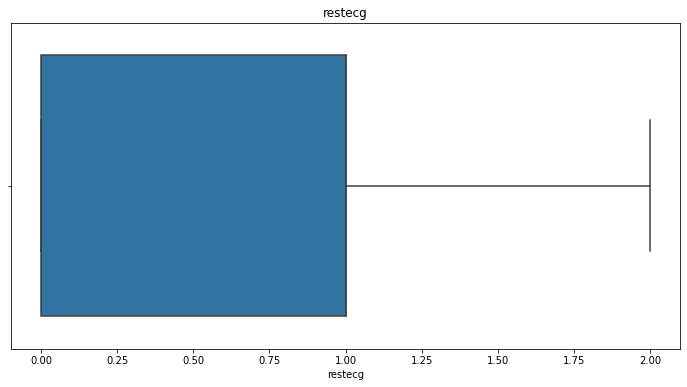

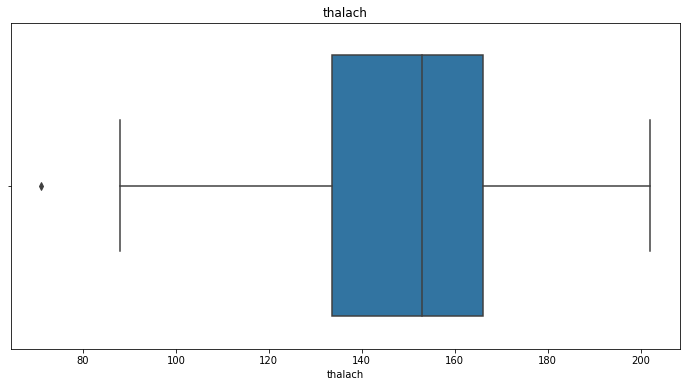

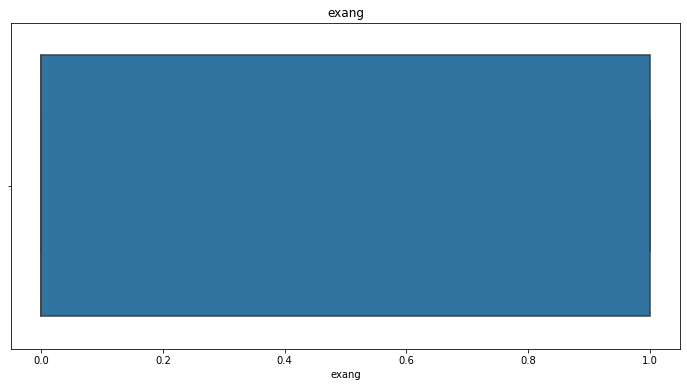

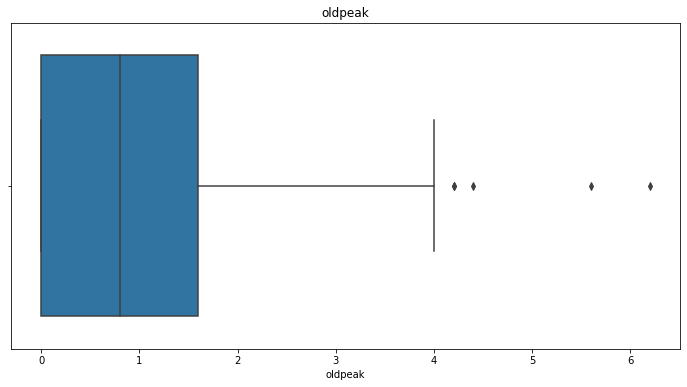

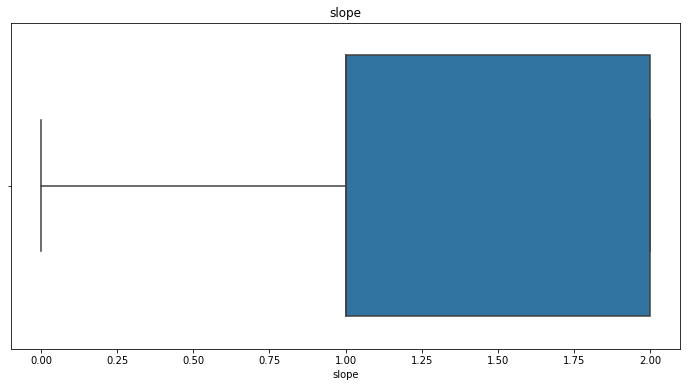

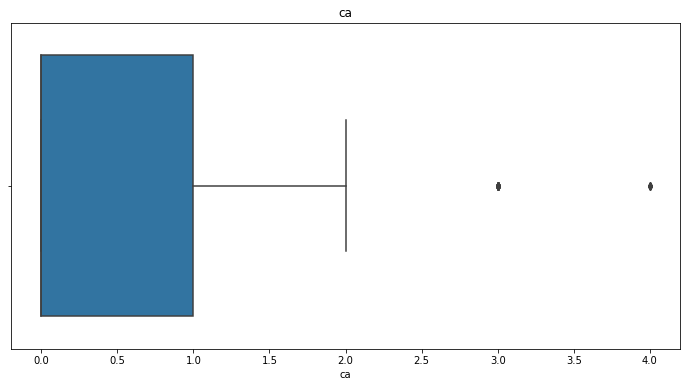

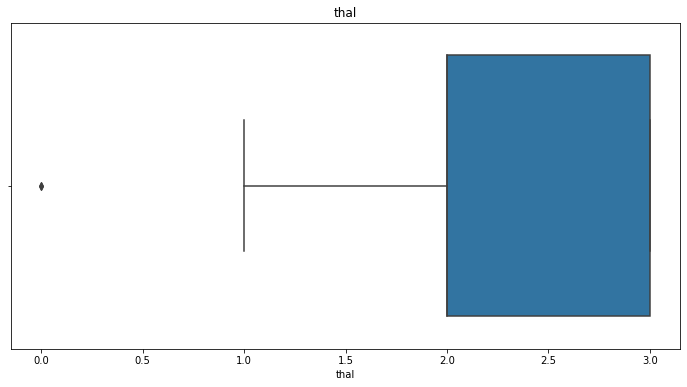

In [31]:
# outlier detection

for i in ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=df[i])
    plt.title(i)

Their are outliers in 3 coulmns ------- 'trestbps', 'chol', 'thalach'

<Figure size 720x720 with 0 Axes>

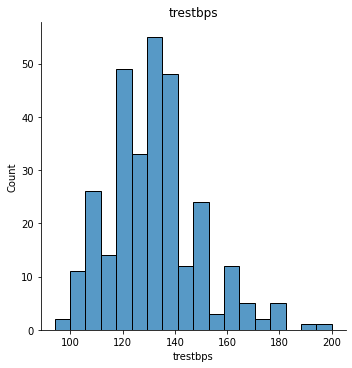

<Figure size 720x720 with 0 Axes>

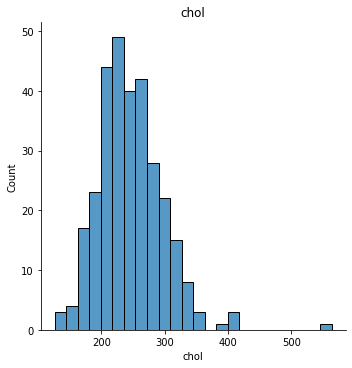

<Figure size 720x720 with 0 Axes>

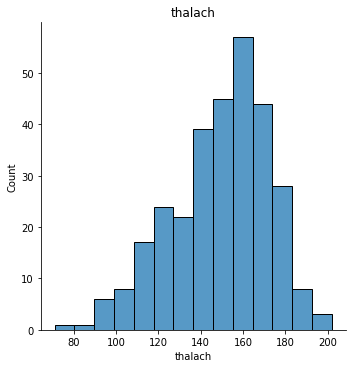

In [32]:
for i in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize=(10, 10))
    sns.displot(df[i])
    plt.title(i)

In [39]:
# These columns following gaussian distributions so we use 2rd std for outlier removal

def remove_outliers(df,feature):
    lower_bound=df[feature].mean()-(2*df[feature].std())
    upper_bound=df[feature].mean()+(2*df[feature].std())  
    
    df.loc[df[feature]<lower_bound,feature]=lower_bound
    df.loc[df[feature]>upper_bound,feature]=upper_bound

In [40]:
for i in ['trestbps', 'chol', 'thalach']:
    remove_outliers(df, i)

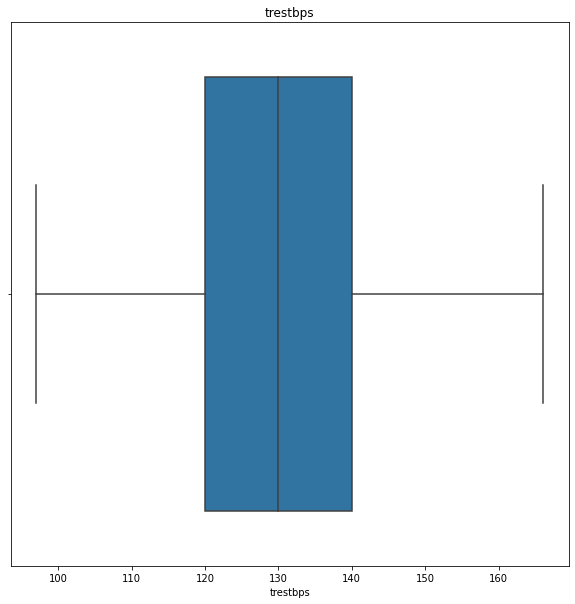

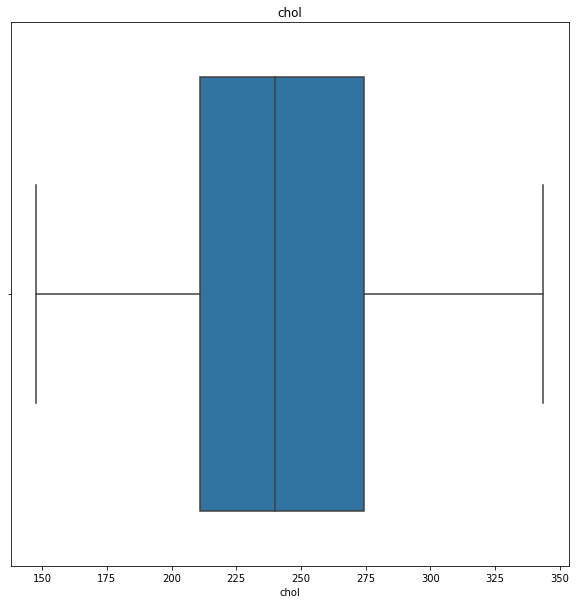

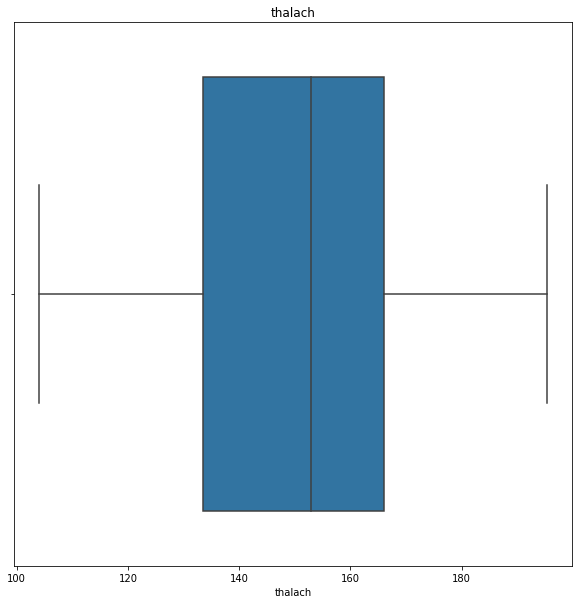

In [41]:
for i in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize=(10, 10))
    sns.boxplot(x=df[i])
    plt.title(i)

In [42]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [43]:
# standarize the values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [44]:
#splitting the data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [45]:
x_train.shape,y_train.shape

((212, 13), (212,))

In [46]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
clf_lgr=LogisticRegression()
clf_lgr.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred=clf_lgr.predict(x_test)

------------------------------------------------Accuracy Score-------------------------------------------------------
0.8131868131868132
------------------------------------------Classfication Report--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

----------------------------------------------------------Confusion Matrix---------------------------------------------


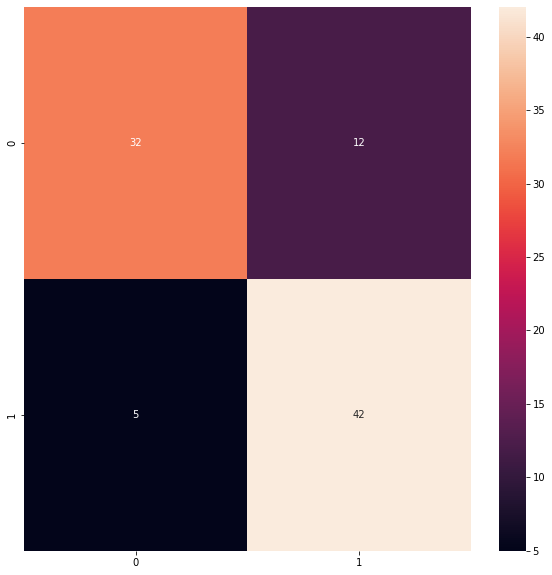

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("------------------------------------------------Accuracy Score-------------------------------------------------------")
print(accuracy_score(y_test, y_pred))

print("------------------------------------------Classfication Report--------------------------------------------------------")
print(classification_report(y_test, y_pred))

print("----------------------------------------------------------Confusion Matrix---------------------------------------------")
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);